# **Import Librarys** 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
import string
import re
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px
from tkinter import *
from tkinter import messagebox
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from IPython.display import display, Image
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold,GridSearchCV,StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris  
import joblib
import pickle
import warnings
from xgboost import XGBClassifier
warnings.filterwarnings("ignore")
print('compelete')

compelete


# **collect data**

In [28]:
df = pd.read_csv("fdata.csv")
df

,label,text
0,Spam,Subject: cat\r\nlogo stationery design\r\nplea...
1,Ham,Ill call you evening ill some ideas.
2,Spam,You have won a guaranteed £200 award or even £...
3,Ham,start date : 12 / 12 / 01 ; hourahead hour : 1...
4,Ham,You intrepid duo you! Have a great time and se...
...,...,...
26961,Spam,our team of u . s . board - certified physicia...
26962,Spam,hello scurrying trumpeting and shouting at fir...
26963,Ham,please find attached the captioned report for ...
26964,Ham,here is the memo we discussed yesterday please...


# **Data analysis and Understanding**

* **understanding data**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26966 entries, 0 to 26965
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   26966 non-null  object
 1   text    26965 non-null  object
dtypes: object(2)
memory usage: 421.5+ KB


In [30]:
df.isnull().value_counts()

label  text 
False  False    26965
       True         1
Name: count, dtype: int64

In [31]:
df.dropna(inplace=True)

In [32]:
df.isnull().value_counts()

label  text 
False  False    26965
Name: count, dtype: int64

In [33]:
# Count the number of dublicate values
df.duplicated().value_counts()

False    26252
True       713
Name: count, dtype: int64

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.duplicated().value_counts()

False    26252
Name: count, dtype: int64

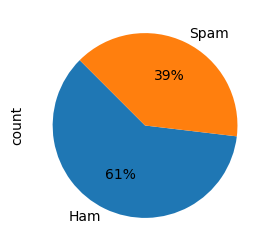

In [36]:
# calculte the precentage of ham and spam message
plt.figure(figsize=(4,3))
df['label'].value_counts().plot.pie(autopct='%1.0f%%',startangle=135)
plt.show()

# **Data Analysis**

In [37]:
df1=df.copy()

* **calculte puncution precentage**

In [44]:
def count_punct (txt):
    count = sum([1 for i in txt if i in string.punctuation])
    return count

df1['punct_precent'] = df1['text'].apply(lambda x : count_punct (x))
punct = df1.groupby('label')['punct_precent'].sum().reset_index(name ='count')
punct['count'] = round((punct['count']/(punct['count'].sum()))*100,2)

 #show result
plt.figure(figsize = (5,3))
sns.barplot(x=punct['label'], y=punct['count'],palette='bright')
plt.title('puncution precentage for spam and ham')
plt.ylabel('precent')
plt.show()


,label,punct_precent
0,Ham,556726
1,Spam,287781


* **calculte length of emails**

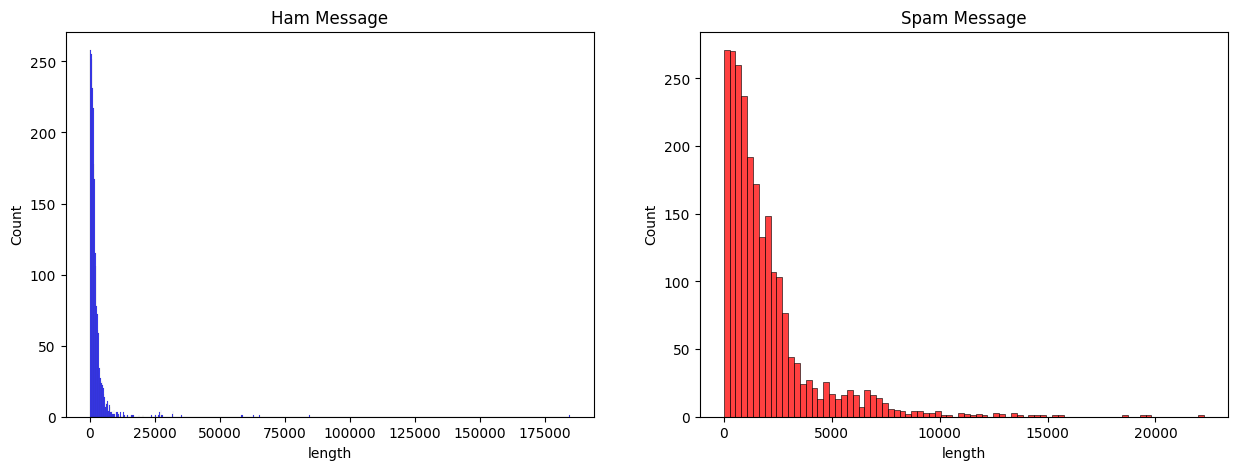

In [71]:
fig , ax = plt.subplots(1,2,figsize=(15,5))
df1['length'] = df1['text'].apply(lambda x : len(x)- x.count(' '))

#apply groupby on ham
ham_len = df1[df1['label'] == 'Ham'].groupby('label')['length'].value_counts().reset_index(name = 'count')
sns.histplot(ham_len['length'] ,ax =ax[0],color='blue' )
ax[0].set_title('Ham Message')

# #apply groupby on spam
spam_len = df1[df1['label'] == 'Spam'].groupby('label')['length'].value_counts().reset_index(name = 'count')
sns.histplot(spam_len['length'] ,ax=ax[1] ,color='red')
ax[1].set_title('Spam Message')
plt.show()

* **calculte Number of consecutive letters**

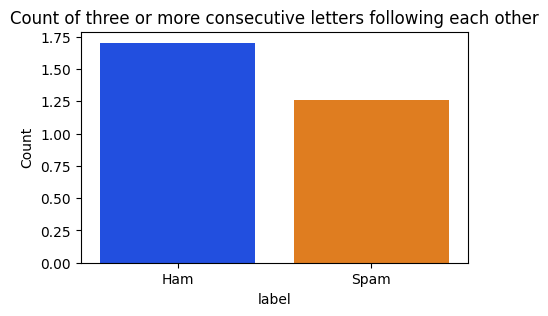

In [72]:
def count_more_rep_letter(text):
    count=len(re.findall(r'(.)\1\1', text))
    return count

df1['more_rep_letter'] = df1['text'].apply(count_more_rep_letter)
grouped_df = df1.groupby('label')['more_rep_letter'].mean().reset_index()

plt.figure(figsize=(5, 3))
sns.barplot(x='label', y='more_rep_letter', data=grouped_df, palette='bright', edgecolor='none')
plt.title('Count of three or more consecutive letters following each other')
plt.ylabel('Count')
# plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()


* **Number Of link**

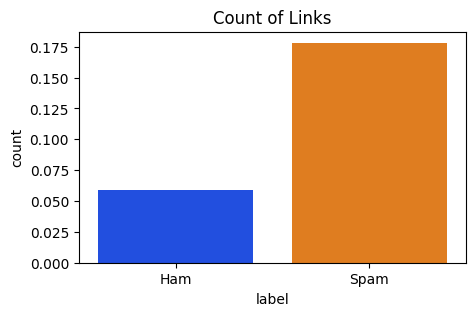

In [73]:
def links(txt):
    count =len(re.findall(r"\b(https?)",txt))
    return count

df1['link'] = df1['text'].apply(lambda x: links(x))
grouped_df = df1.groupby('label')['link'].sum().reset_index(name='count')
grouped_df['count']= grouped_df['count']/len(df)

plt.figure(figsize = (5,3))
sns.barplot(data=grouped_df,x='label', y='count',palette='bright')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.title('Count of Links')
plt.ylabel('count')
plt.show()

* **Number Of digits**

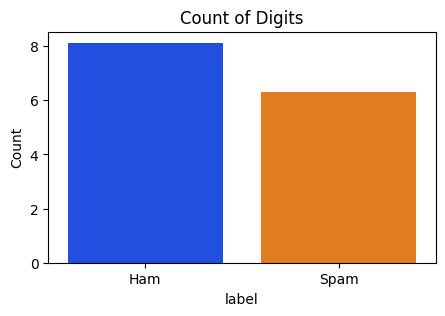

In [74]:
digit = r'\d+'

def digits(txt):
    count=len(re.findall(digit, txt))
    return count

df1['digit'] = df1['text'].apply(lambda x: digits(x))
grouped_df = df1.groupby('label')['digit'].mean().reset_index()

plt.figure(figsize=(5,3))
sns.barplot(x='label', y='digit',data=grouped_df,palette='bright')
plt.title("Count of Digits")
plt.ylabel("Count")
plt.show()

# **data preprocessing**

In [75]:
stop_words=nltk.corpus.stopwords.words('english')
def stp(text):
    return ' '.join([x for x in text.split() if x not in stop_words])


def remove_punc(text):
    text_nonpunc="".join([char for char in text if char not in string.punctuation])
    return text_nonpunc


lem=WordNetLemmatizer()
def lemmatizing (text):
    lemmtize=[lem.lemmatize(word,pos='v') for word in text]
    return lemmtize

*  **Step 1 :** Convert All String To Lower Case

In [76]:
df['text']=df['text'].apply(lambda x: x.lower())

In [77]:
df.head()

,label,text
0,Spam,subject: cat\r\nlogo stationery design\r\nplea...
1,Ham,ill call you evening ill some ideas.
2,Spam,you have won a guaranteed £200 award or even £...
3,Ham,start date : 12 / 12 / 01 ; hourahead hour : 1...
4,Ham,you intrepid duo you! have a great time and se...


* **Step 2 :** Removing Stop Words and Split Words

In [78]:
df['text']=df['text'].apply(lambda x: stp(x))
df.head()

,label,text
0,Spam,subject: cat logo stationery design please vis...
1,Ham,ill call evening ill ideas.
2,Spam,guaranteed £200 award even £1000 cashto claim ...
3,Ham,start date : 12 / 12 / 01 ; hourahead hour : 1...
4,Ham,intrepid duo you! great time see soon.


* **Step 3 :** Remove Punctutions

In [79]:
df['text']=df['text'].apply(lambda x: remove_punc(x))
df.head()

,label,text
0,Spam,subject cat logo stationery design please visi...
1,Ham,ill call evening ill ideas
2,Spam,guaranteed £200 award even £1000 cashto claim ...
3,Ham,start date 12 12 01 hourahead hour 13 ho...
4,Ham,intrepid duo you great time see soon


* **step 4 :** Tokenization

In [80]:
df['text']=df['text'].apply(lambda x: word_tokenize(x))
df.head()

,label,text
0,Spam,"[subject, cat, logo, stationery, design, pleas..."
1,Ham,"[ill, call, evening, ill, ideas]"
2,Spam,"[guaranteed, £200, award, even, £1000, cashto,..."
3,Ham,"[start, date, 12, 12, 01, hourahead, hour, 13,..."
4,Ham,"[intrepid, duo, you, great, time, see, soon]"


* **Step 5 :** Apply Lemmatizing

In [81]:
df['text']=df['text'].apply(lambda x: lemmatizing(x))
df.head()

,label,text
0,Spam,"[subject, cat, logo, stationery, design, pleas..."
1,Ham,"[ill, call, even, ill, ideas]"
2,Spam,"[guarantee, £200, award, even, £1000, cashto, ..."
3,Ham,"[start, date, 12, 12, 01, hourahead, hour, 13,..."
4,Ham,"[intrepid, duo, you, great, time, see, soon]"


In [82]:
# Convert list of Strings into single String to apply TF-IDF
df['text'] = df['text'].apply(lambda x: ' '.join(x))
df.head()


,label,text
0,Spam,subject cat logo stationery design please visi...
1,Ham,ill call even ill ideas
2,Spam,guarantee £200 award even £1000 cashto claim u...
3,Ham,start date 12 12 01 hourahead hour 13 hourahea...
4,Ham,intrepid duo you great time see soon


* **Word Cloud For Spam**

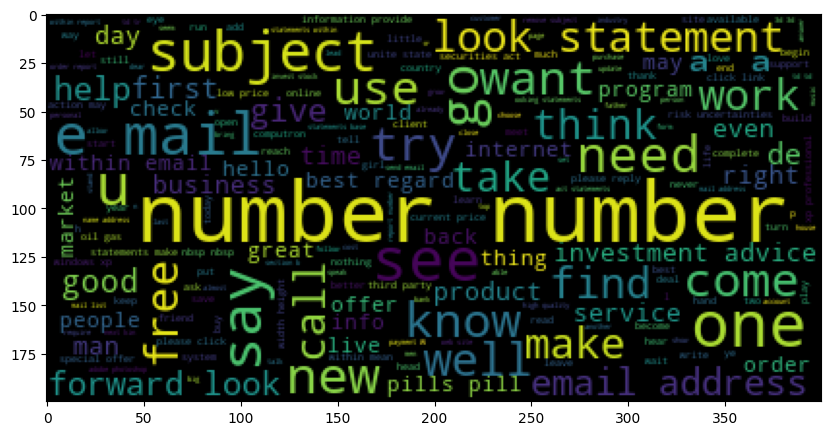

In [83]:
plt.figure(figsize=(10,10))
dt = df[df['label']=='Spam']['text']
wc = WordCloud(background_color='black')
p = wc.generate(dt.str.cat(sep=' '))
plt.imshow(p)
plt.show()

* **Word Cloud For Ham**

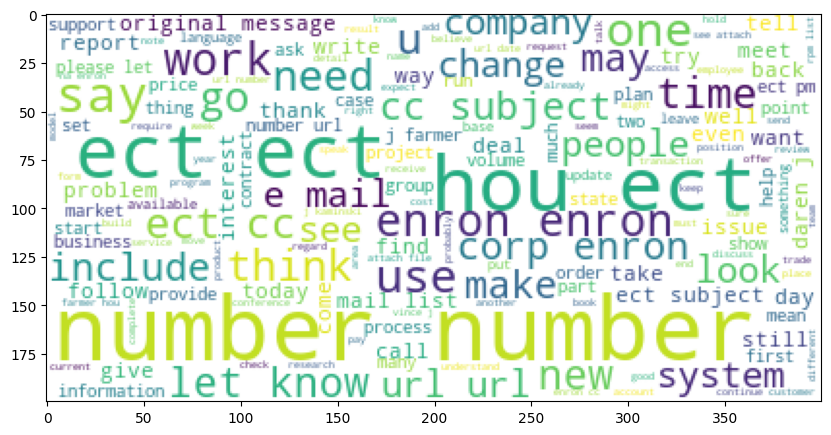

In [84]:
plt.figure(figsize=(10,10))
dt=df[df['label']=='Ham']['text']
wc=WordCloud(background_color='white')
p=wc.generate(dt.str.cat(sep=' '))
plt.imshow(p)
plt.show()

* **Step 6 :** Apply TF-IDF

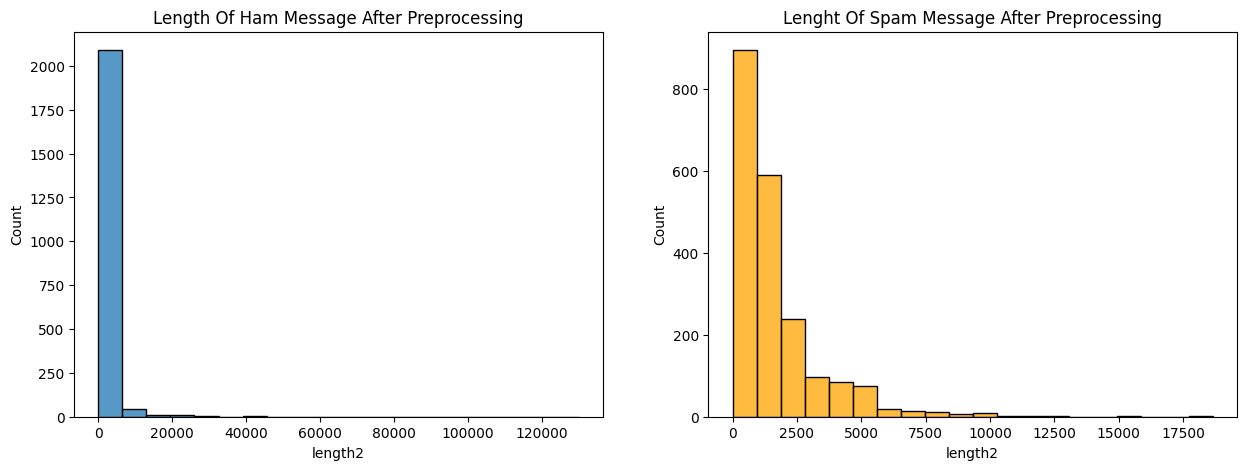

In [85]:
fig1 , ax = plt.subplots(1,2,figsize=(15,5))

df1['length2'] = df['text'].apply(lambda x : len(x)- x.count(' '))

#apply groupby on ham
ham_len = df1[df1['label'] == 'Ham'].groupby('label')['length2'].value_counts().reset_index(name = 'count')
sns.histplot(ham_len['length2'] ,ax =ax[0] ,bins =20)
ax[0].set_title('Length Of Ham Message After Preprocessing')

#apply groupby on spam
spam_len = df1[df1['label'] == 'Spam'].groupby('label')['length2'].value_counts().reset_index(name = 'count')
sns.histplot(spam_len['length2'] ,ax=ax[1] ,bins = 20,color='orange')

ax[1].set_title('Lenght Of Spam Message After Preprocessing')
plt.show()

In [86]:
#Split label column and drop it from data set
target=df['label']
df.drop(columns=['label'],inplace=True)

In [87]:
df

,text
0,subject cat logo stationery design please visi...
1,ill call even ill ideas
2,guarantee £200 award even £1000 cashto claim u...
3,start date 12 12 01 hourahead hour 13 hourahea...
4,intrepid duo you great time see soon
...,...
26961,team u board certify physicians pharmacists pr...
26962,hello scurry trumpet shout first aking france ...
26963,please find attach caption report week end jun...
26964,memo discuss yesterday please review forward c...


In [90]:
#split all data set into Train and test dat
X_train, X_test, y_train, y_test = train_test_split(df,target, test_size=0.2,shuffle=True)

In [91]:
X_train

,text
10547,test pass darwin linux resolve ticket
3780,subject copy cassette tape mp 3 vice versa 137...
15328,oh haha den shld go today too gee nvm la kaiez...
24386,john please authorize attachment forward sap s...
23449,urgent washington ap federal regulators vote m...
...,...
7317,shall call dear food
24410,hello would like offer localize software versi...
24550,aw p
24003,director officer non us corporation within enr...


In [92]:
TFIDF = TfidfVectorizer(ngram_range=(1,2))
tfidf_model = TFIDF.fit(X_train['text'])
tfidf_train = TFIDF.transform(X_train['text'])
tfidf_test = tfidf_model.transform(X_test['text'])

In [70]:
joblib.dump(tfidf_model, 'tfidf_model.pkl')

['tfidf_model.pkl']

# **K Nearst Neaighbours (KNN)**

* **Modeling**

In [71]:
model_KNN = KNeighborsClassifier(n_neighbors=15, algorithm='kd_tree', metric='minkowski')
model_KNN.fit(tfidf_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=15)

* **Evalution**

In [72]:
y_test_pred_KNN = model_KNN.predict(tfidf_test)
y_train_pred_KNN = model_KNN.predict(tfidf_train)
test_accuracy_KNN = accuracy_score(y_test,y_test_pred_KNN)
train_accuracy_KNN = accuracy_score(y_train,y_train_pred_KNN)
print("test_Accuracy:", test_accuracy_KNN)
print("train_Accuracy:", train_accuracy_KNN)


test_Accuracy: 0.9176710550713888
train_Accuracy: 0.9984238828110513


[[3115   82]
 [ 362 1834]]


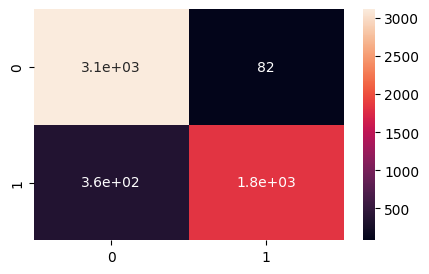

In [73]:
plt.figure(figsize = (5,3))
Cm_KNN = confusion_matrix(y_test,y_test_pred_KNN)
sns.heatmap(Cm_KNN ,annot =True)
print(Cm_KNN)
plt.show()

In [74]:
filename = 'large_KNN_model.pkl'
joblib.dump(model_KNN,filename)

['large_KNN_model.pkl']

# **NaiveBase**

* **Modeling**

In [75]:
model_NB = MultinomialNB()
model_NB.fit(tfidf_train, y_train)

MultinomialNB()

* **Evalution**

In [76]:
y_test_pred_NB=model_NB.predict(tfidf_test)
y_train_pred_NB=model_NB.predict(tfidf_train)
test_accuracy_NB=accuracy_score(y_test,y_test_pred_NB)
train_accuracy_NB=accuracy_score(y_train,y_train_pred_NB)
print("test_Accuracy:", test_accuracy_NB)
print("train_Accuracy:", train_accuracy_NB)

test_Accuracy: 0.9139625440385685
train_Accuracy: 0.9852586686445393


[[3157   40]
 [ 424 1772]]


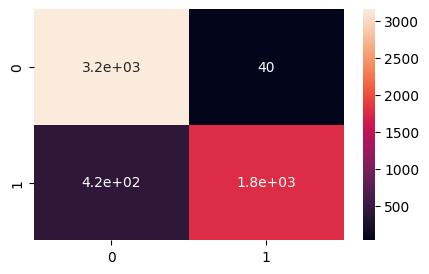

In [77]:
# present confusion matrix
plt.figure(figsize = (5,3))
Cm_NB = confusion_matrix(y_test,y_test_pred_NB)
sns.heatmap(Cm_NB ,annot =True)
print(Cm_NB)
plt.show()

In [78]:
filename = 'large_NB_model.pkl'
joblib.dump(model_NB,filename)

['large_NB_model.pkl']

# **RandomForest**

* **Modeling**

In [79]:
model_RF = RandomForestClassifier(n_estimators=100,random_state=42)
model_RF.fit(tfidf_train, y_train)
filename = 'Final_RF_model.pkl'
joblib.dump(model_RF,filename)

['Final_RF_model.pkl']

* **Evalution**

In [80]:
y_test_pred_RF=model_RF.predict(tfidf_test)
y_train_pred_RF=model_RF.predict(tfidf_train)
test_accuracy_RF=accuracy_score(y_test,y_test_pred_RF)
train_accuracy_RF=accuracy_score(y_train,y_train_pred_RF)
print("test_Accuracy:", test_accuracy_RF)
print("train_Accuracy:", train_accuracy_RF)

test_Accuracy: 0.9286111626182088
train_Accuracy: 0.999629148896718


[[3167   30]
 [ 355 1841]]


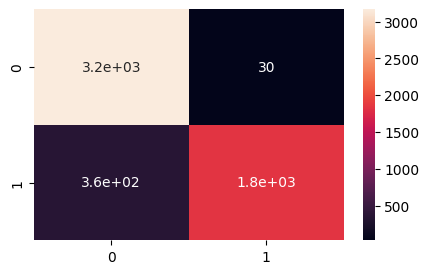

In [81]:
# present confusion matrix
plt.figure(figsize = (5,3))
Cm_RF = confusion_matrix(y_test,y_test_pred_RF)
sns.heatmap(Cm_RF ,annot =True)
print(Cm_RF)
plt.show()

# **Support Vector Machine (SVM)**

* **Modeling**

In [82]:
model_SVM = SVC(kernel="sigmoid", gamma=1, C=0.5, probability=True)  # You can choose different kernels like 'rbf', 'poly', etc.
model_SVM.fit(tfidf_train, y_train)
filename = 'large_SVM_model.pkl'
joblib.dump(model_SVM,filename)

['large_SVM_model.pkl']

* **Evalution**

In [83]:
y_test_pred_SVM=model_SVM.predict(tfidf_test)
y_train_pred_SVM=model_SVM.predict(tfidf_train)
test_accuracy_SVM=accuracy_score(y_test,y_test_pred_SVM)
train_accuracy_SVM=accuracy_score(y_train,y_train_pred_SVM)
print("test_Accuracy:", test_accuracy_SVM)
print("train_Accuracy:", train_accuracy_SVM)

test_Accuracy: 0.9519747821249768
train_Accuracy: 0.988689041349898


[[3068  129]
 [ 130 2066]]


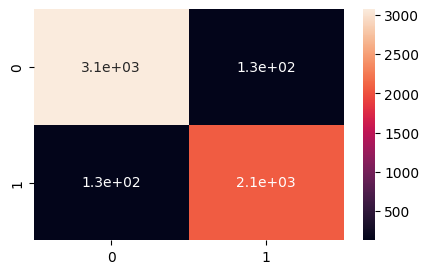

In [84]:
# present confusion matrix
plt.figure(figsize = (5,3))
Cm_SVM = confusion_matrix(y_test,y_test_pred_SVM)
sns.heatmap(Cm_SVM ,annot =True)
print(Cm_SVM)
plt.show()

# **SGD**

* **modeling**

In [85]:
model_SGD = SGDClassifier()
model_SGD.fit(tfidf_train, y_train)
filename = 'large_SGD_model.pkl'
joblib.dump(model_SVM,filename)

['large_SGD_model.pkl']

* **Evalution**

In [86]:
y_test_pred_SGD=model_SGD.predict(tfidf_test)
y_train_pred_SGD=model_SGD.predict(tfidf_train)
test_accuracy_SGD=accuracy_score(y_test,y_test_pred_SGD)
train_accuracy_SGD=accuracy_score(y_train,y_train_pred_SGD)
print("test_Accuracy:", test_accuracy_SGD)
print("train_Accuracy:", train_accuracy_SGD)

test_Accuracy: 0.9488225477470795
train_Accuracy: 0.9924902651585389


[[3077  120]
 [ 156 2040]]


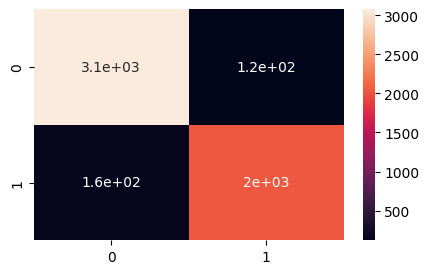

In [87]:
plt.figure(figsize = (5,3))
Cm_SGD = confusion_matrix(y_test,y_test_pred_SGD)
sns.heatmap(Cm_SGD ,annot =True)
print(Cm_SGD)
plt.show()

# **Logistic regression model**

* **modeling**

In [88]:
model_LOG = LogisticRegression()
model_LOG.fit(tfidf_train,y_train)
filename = 'large_LOG_model.pkl'
joblib.dump(model_LOG,filename)

['large_LOG_model.pkl']

* **Evalution**

In [89]:
y_test_pred_LOG=model_LOG.predict(tfidf_test)
y_train_pred_LOG=model_LOG.predict(tfidf_train)
test_accuracy_LOG=accuracy_score(y_test,y_test_pred_LOG)
train_accuracy_LOG=accuracy_score(y_train,y_train_pred_LOG)
print("test_Accuracy:", test_accuracy_LOG)
print("train_Accuracy:", train_accuracy_LOG)

test_Accuracy: 0.9401075468199518
train_Accuracy: 0.985026886704988


[[3071  126]
 [ 197 1999]]


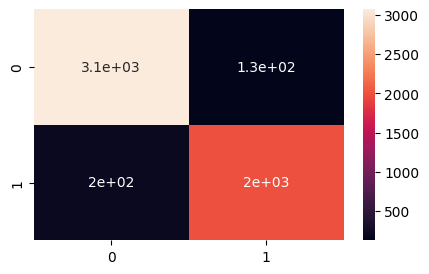

In [90]:
plt.figure(figsize = (5,3))
Cm_LOG = confusion_matrix(y_test,y_test_pred_LOG)
sns.heatmap(Cm_LOG ,annot =True)
print(Cm_LOG)
plt.show()

# **XGBClassifier**

* **modeling**

In [91]:
mapping = {"Spam": 1, "Ham": 0}
encoded_target1 = [mapping[item] for item in y_train]
encoded_target2 = [mapping[item] for item in y_test]

In [92]:
model_XGB=XGBClassifier(n_estimators=50, random_state=42)
model_XGB.fit(tfidf_train,encoded_target1)
filename = 'large_XGB_model.pkl'
joblib.dump(model_XGB,filename)

['large_XGB_model.pkl']

* **Evalution**

In [93]:
y_test_pred_XGB=model_XGB.predict(tfidf_test)
y_train_pred_XGB=model_XGB.predict(tfidf_train)
test_accuracy_XGB=accuracy_score(encoded_target2,y_test_pred_XGB)
train_accuracy_XGB=accuracy_score(encoded_target1,y_train_pred_XGB)
print("test_Accuracy:", test_accuracy_XGB)
print("train_Accuracy:", train_accuracy_XGB)

test_Accuracy: 0.885221583534211
train_Accuracy: 0.9116447246430558


[[3113   84]
 [ 535 1661]]


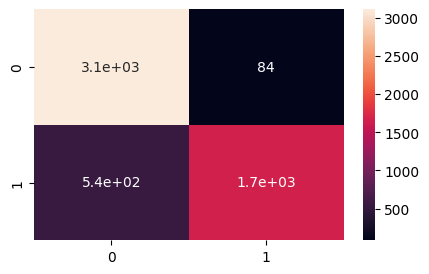

In [94]:
plt.figure(figsize = (5,3))
Cm_XGB= confusion_matrix(encoded_target2,y_test_pred_XGB)
sns.heatmap(Cm_XGB ,annot =True)
print(Cm_XGB)
plt.show()

# **Deployment**

In [99]:
model_RF=joblib.load('Final_RF_model.pkl')
model_LOG=joblib.load('large_LOG_model.pkl')
model_SVM=joblib.load('large_SVM_model.pkl')
model_SGD=joblib.load('large_SGD_model.pkl')
tfidf=joblib.load('tfidf_model.pkl')

In [100]:
def pre_processing(text):
     s=''
     text=stp(text)
    
     text=remove_punc(text)
    
     token=word_tokenize(text)
    
     les=lemmatizing(token)
    
     text2=' '.join(les).lower()
    
     tfidf_pred = tfidf.transform([text2])
    
     x=model_RF.predict(tfidf_pred)
     y=model_SVM.predict(tfidf_pred)
     z=model_LOG.predict(tfidf_pred)
     n=model_SGD.predict(tfidf_pred)
     s=x+' '+y+' '+z+' '+n
     return s



font='Times New Roman'
def pred(uservalue,text_var,root):
    text_var.set("") 
    if uservalue.get() == '   enter your email' or uservalue.get()=='':
        messagebox.showinfo("Error", "Please write something!")
    else:       
       text_var.set(pre_processing(uservalue.get()))
      
       if pre_processing(uservalue.get())=="Spam":
             
             Label(root,textvariable=text_var, bg='#040e17', fg='red', font=(font, 19)).place(x=307, y=207)
       else:
            Label(root,textvariable=text_var, bg='#040e17', fg='green', font=(font, 19)).place(x=307, y=207)
    uservalue.set('')
         
        

In [102]:

def on_enter(e):
    user.delete(0,'end')
  
def on_leave(e):
    name = user.get()
    if name == '':
        user.insert(0,'   enter your email')

# Text to display
text = "Your text here"

# Create the main window
root = Tk()
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
x = (screen_width - 800) // 2
y = (screen_height - 600) // 2
root.geometry(f"{800}x{550}+{x}+{y}")
root['bg'] = '#040e17'
root.resizable(0, 0)
root.title('Email classifier')

# Declare uservalue as a global variable
uservalue = StringVar()
font='Times New Roman'
text_var = StringVar()
# Create widgets

Label(root, text="Email classifier", bg='#040e17', fg='white', font=(font, 25, 'bold')).place(x=310, y=10)
Label(root, text="Email", bg='#040e17', fg='white', font=(font, 17)).place(x=55, y=80)

user = Entry(root, textvariable=uservalue, width=52, font=(font, 18, 'italic'))
user.insert(0, '   enter your email')
user.place(x=135, y=84)
user.bind('<FocusIn>', on_enter)
user.bind('<FocusOut>', on_leave)
Button(root, text="classify", bg='white', fg='#040e17',font=(font, 19),command=lambda:pred(uservalue,text_var,root)).place(x=355, y=150)

 


# Run the main event loop
root.mainloop()
# print(uservalue.get())


# **Applying Cross Validation**

In [ ]:
kf = KFold(n_splits=5)
best=[]
temp=0
for train_index, test_index in kf.split(df):    
    print("TRAIN:", train_index, "TEST:", test_index)

    train_data, test_data = df.iloc[train_index], df.iloc[test_index]

    target_train=train_data['label']

    train_data.drop(columns='label',inplace=True)

    target_test=test_data['label']

    test_data.drop(columns='label',inplace=True)

    tfidf = TfidfVectorizer(ngram_range=(1,2))

    tfidf_train = tfidf.fit_transform(train_data['text'])
    tfidf_test=tfidf.transform(test_data['text'])
    
    model=RandomForestClassifier(n_estimators=300,random_state=42)
    model.fit(tfidf_train,target_train)
    preds=model.predict(tfidf_test)
    acc=accuracy_score(target_test,preds)
    
    if acc>temp:
        temp=acc
        best=[tfidf_train,target_train,tfidf_test,target_test]

    print("Train data:\n", train_data)
    print("Test data:\n", test_data)

In [156]:
tfidf = TfidfVectorizer(ngram_range=(1,2))
tfidf_train = tfidf.fit_transform(best[0]['text'])
tfidf_test=tfidf.transform(best[2]['text'])

In [157]:
tfidf_train

<29121x1544418 sparse matrix of type '<class 'numpy.float64'>'
	with 5254518 stored elements in Compressed Sparse Row format>

In [158]:
model.fit(tfidf_train,best[1])
y_pred=model.predict(tfidf_test)
acc=accuracy_score(best[3],y_pred)
acc


0.9635989010989011